# Quantum Noise Synth

Consider a quantum tunnel junction. An audio cosine signal of angular frequency $\omega$ amplitude x in kelvin units is applied to the junction.  The integrated noise power in kelvin is measured as a response.  This response will depend on the quantum microwave frequency in kelvin units, the temperature T in kelvin, the total(quantum, thermal, amplifier, loss all together) average noise power fluctuation amplitude z in kelvin, and the audio frequency of the input signal.

The input is an audio signal calibrated in units of kelvin and the output is also an audio signal calibrated in units of kelvin.


$$
p(t,x,y,\omega,T) = z\eta(t) + T\left(\frac{x\cos{(\omega t)} + y}{T}\right)\coth{\left(\frac{x\cos{(\omega t)} + y}{T}\right)} + T\left(\frac{x\cos{(\omega t)} - y}{T}\right)\coth{\left(\frac{x\cos{(\omega t)} - y}{T}\right)},
$$

where 

$$
y \equiv \frac{hf_{microwave}}{2k_B},
$$

and $\eta(t)$ is a Gaussian random signal of standard deviation 1.




$$
p = T_N + T\left(\frac{eV(t) + hf_{microwave}}{2k_BT}\right)\coth{\left(\frac{eV(t) + hf_{microwave}}{2k_BT}\right)} + T\left(\frac{eV(t) - hf_{microwave}}{2k_BT}\right)\coth{\left(\frac{eV(t) - hf_{microwave}}{2k_BT}\right)}
$$

Voltage is a cosine wave of amplitude A and angular frequency $\omega$, which is $2\pi$ times the audio frequency $f_{audio}$:

$$
V(t) = A\cos{(\omega t)}
$$

We define an audio amplitude in kelvin as:
$$
x \equiv \frac{eA}{2k_B}
$$
and a quantumn frequency also in kelvin as:
$$
y \equiv \frac{hf_{microwave}}{2k_B},
$$

We call the function $z\eta(t)$ a Gaussian noise source of amplitude z kelvin which is added to the signal.  The total noise power after subtracting DC values is then:


$$
p(t) = z\eta(t) + T\left(\frac{x\cos{(\omega t)} + y}{T}\right)\coth{\left(\frac{x\cos{(\omega t)} + y}{T}\right)} + T\left(\frac{x\cos{(\omega t)} - y}{T}\right)\coth{\left(\frac{x\cos{(\omega t)} - y}{T}\right)}
$$

Define
$$
\Phi(\phi) \equiv \phi\coth{\phi}
$$

And rewrite the equation as 

$$
p(t) = z\eta(t) + T\Phi\left(\frac{x\cos{(\omega t)} + y}{T}\right) + T\Phi\left(\frac{x\cos{(\omega t)} - y}{T}\right)
$$

We take T to be the temperature in kelvin, and x to be the 60 Hz pickup in kelvin, y to be the quantum frequency in kelvin, z to be the fluctuation in kelvin, and proceed to calculate the wave form for T = 0.05 kelvin, x = 1 kelvin, y = 0.25 kelvin, z = 0.5 kelvin.  We calculate the waveform, play it out as sound, create different wave forms, create user interfaces, create algorithms to match waveforms from experiments with waveforms from simulations.

$$
p(t) = G\left[z\eta(t) + T\Phi\left(\frac{x\cos{(\omega t)} + y}{T}\right) + T\Phi\left(\frac{x\cos{(\omega t)} - y}{T}\right)\right]
$$

And define 

$$
\Pi(x,y,T,t) \equiv \Phi\left(\frac{x\cos{(\omega t)} + y}{T}\right) + \Phi\left(\frac{x\cos{(\omega t)} - y}{T}\right)
$$

$$
p(t) = G(z\eta(t) + T\Pi(x,y,T,t))
$$

$\xi$

In [1]:
import numpy as np
from IPython.display import Audio

# Set the sample rate and duration
sr = 44100  # 44.1 kHz sample rate
duration = 5  # 5 seconds

# Create the time array
t = np.linspace(0, duration, sr * duration, endpoint=False)

# Create the 60 Hz sine wave
omega = 2 * np.pi * 440
sine_waveform = np.sin(omega * t)

# Play the sine wave
audio = Audio(data=sine_waveform, rate=sr)
display(audio)


In [2]:
def Phi(x):
    if x == 0:
        return 1
    else:
        return x / np.tanh(x)

In [3]:
def Phi(x):
    if x == 0:
        return 1
    else:
        return x / np.tanh(x)
    
def Pi(x,y,T,t):
    return Phi((x*np.cos(omega * t) + y)/T) + Phi((x*np.cos(omega * t) - y)/T)

In [28]:
Pi(2,0.25,0.05,0)

80.0

time = 0, audio bias x from -1 to 1 kelvin, frequency is y = 0.25 kelvin, temperature is 0.05 kelvin 

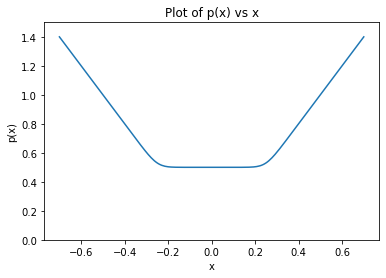

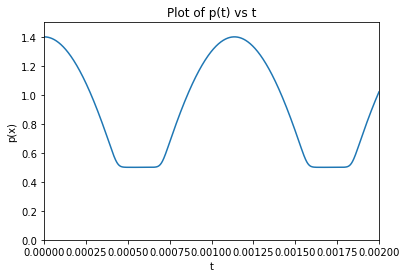

In [14]:
import matplotlib.pyplot as plt
import numpy as np

quantum_frequency = 0.25
temperature = 0.03
audio_amplitude = 0.7

# Generate 200 x values from -audio_amplitude to audio_amplitude:
x_values = np.linspace(-audio_amplitude, audio_amplitude, num=200)  
p_values = np.array([temperature*Pi(x,quantum_frequency,temperature,0) for x in x_values])  #

plt.plot(x_values, p_values)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Plot of p(x) vs x')
plt.ylim(0, 1.5)

plt.show()

# Generate 200 x values from -audio_amplitude to audio_amplitude:
t_values = np.linspace(0, 0.002, num=1000)  
p_values = np.array([temperature*Pi(audio_amplitude,quantum_frequency,temperature,t) for t in t_values])  # Calculate pi for each x value

plt.plot(t_values, p_values)
plt.xlabel('t')
plt.ylabel('p(x)')
plt.title('Plot of p(t) vs t')
plt.xlim(0, 0.002)
plt.ylim(0, 1.5)
plt.show()


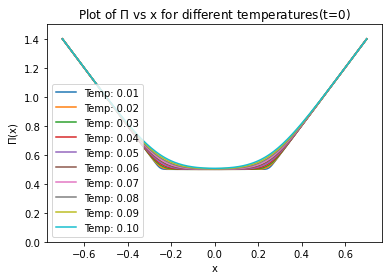

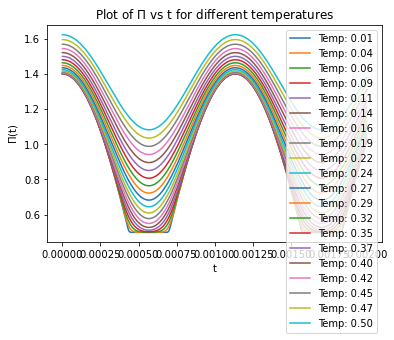

In [19]:
import matplotlib.pyplot as plt
import numpy as np

quantum_frequency = 0.25
audio_amplitude = 0.7

# Generate 200 x values from -audio_amplitude to audio_amplitude:
x_values = np.linspace(-audio_amplitude, audio_amplitude, num=200)

# Plot phi vs. x for temperature values ranging from 0.01 to 0.1:
for temperature in np.linspace(0.01, 0.1, num=10):
    phi_values = np.array([temperature*Pi(x, quantum_frequency, temperature, 0) for x in x_values])
    plt.plot(x_values, phi_values, label=f"Temp: {temperature:.2f}")

plt.xlabel('x')
plt.ylabel('$\Pi$(x)')
plt.title('Plot of $\Pi$ vs x for different temperatures(t=0)')
plt.legend()
plt.ylim(0, 1.5)

plt.show()

# Generate 200 x values from -audio_amplitude to audio_amplitude:
t_values = np.linspace(0, 0.002, num=1000)

# Plot phi vs. t for temperature values ranging from 0.01 to 0.1:
for temperature in np.linspace(0.01, 0.5, num=20):
    phi_values = np.array([temperature*Pi(audio_amplitude, quantum_frequency, temperature, t) for t in t_values])
    plt.plot(t_values, phi_values, label=f"Temp: {temperature:.2f}")

plt.xlabel('t')
plt.ylabel('$\Pi$(t)')
plt.title('Plot of $\Pi$ vs t for different temperatures')
plt.legend()
plt.show()


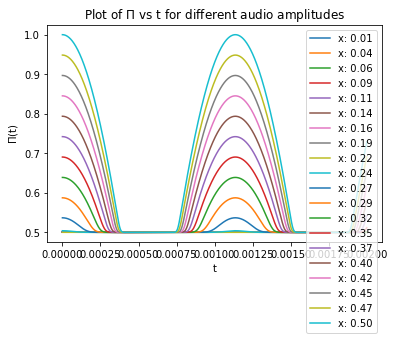

In [24]:
import matplotlib.pyplot as plt
import numpy as np

quantum_frequency = 0.25
audio_amplitude = 0.7

# Generate 200 x values from -audio_amplitude to audio_amplitude:
x_values = np.linspace(0, audio_amplitude, num=200)

temperature = 0.01;

# Generate 200 x values from -audio_amplitude to audio_amplitude:
t_values = np.linspace(0, 0.002, num=1000)

for audio_amplitude in np.linspace(0.01, 0.5, num=20):
    phi_values = np.array([temperature*Pi(audio_amplitude, quantum_frequency, temperature, t) for t in t_values])
    plt.plot(t_values, phi_values, label=f"x: {audio_amplitude:.2f}")

plt.xlabel('t')
plt.ylabel('$\Pi$(t)')
plt.title('Plot of $\Pi$ vs t for different audio amplitudes')
plt.legend()
plt.show()


What we want to do is sweep the amplitude of the audio input and see a response which is nonlinear and has a level where it turns on which is based on the microwave frequency in kelvin, and knowing that frequency will calibrate that curve to get the relationship between applied signal at the top of the fridge and bias on the device. The shape of that curve will give the temperature.  The white noise is integrated down to get the total fluctuation in the band, and that can be compared with the amplitude of the output signal to get the total noise power at the output of the junction including both the quantum noise of the junction and the amplifier noise at the plane of the junction(so including all attenuation between junction and amplifier).  Thus we use frequency to calibrate the whole system without any measurement of voltage in real units at the device, meaning the coupling to the device can be lossy and 2 wire.  

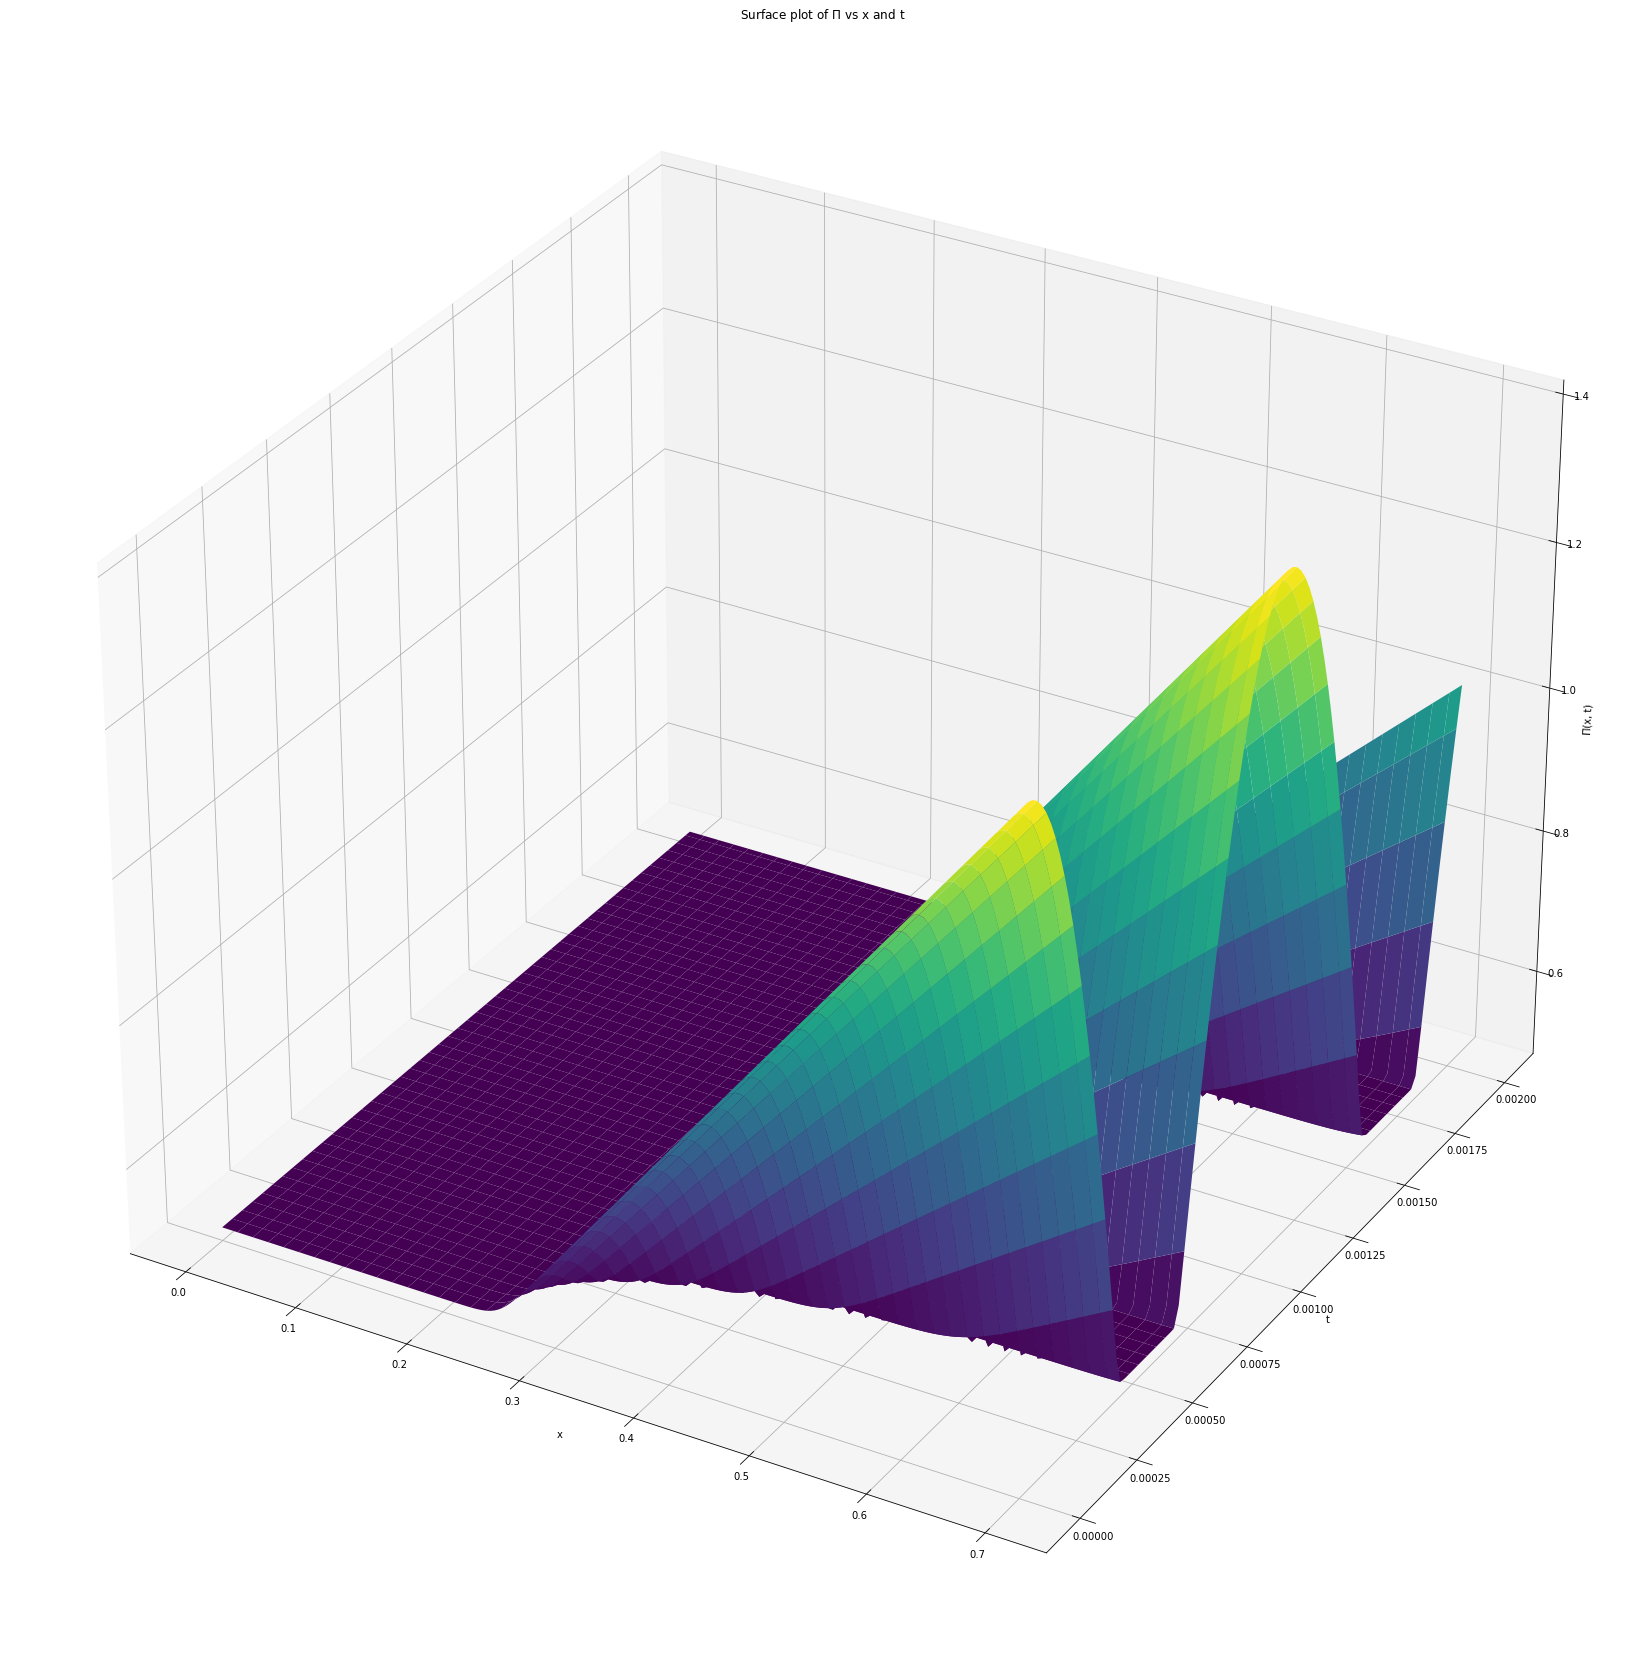

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

quantum_frequency = 0.25
audio_amplitude = 0.7

# Generate 200 x values from -audio_amplitude to audio_amplitude:
x_values = np.linspace(0, audio_amplitude, num=200)

temperature = 0.01;

# Generate 200 x values from -audio_amplitude to audio_amplitude:
t_values = np.linspace(0, 0.002, num=100)

# Create a 2D grid of x_values and t_values
X, T = np.meshgrid(x_values, t_values)

# Calculate Pi values for each combination of X and T
Z = np.array([temperature * Pi(x, quantum_frequency, temperature, t) for x, t in zip(np.ravel(X), np.ravel(T))])
Z = Z.reshape(X.shape)

# Create a 3D plot
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('$\Pi$(x, t)')
ax.set_title('Surface plot of $\Pi$ vs x and t')
plt.show()


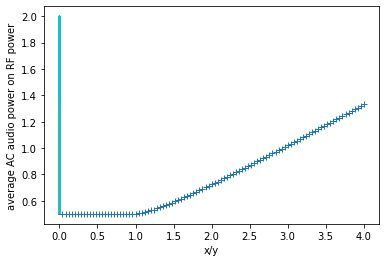

In [51]:
import matplotlib.pyplot as plt
import numpy as np

quantum_frequency = 0.25
audio_amplitude = 0.7

# Generate 200 x values from -audio_amplitude to audio_amplitude:
x_values = np.linspace(0, audio_amplitude, num=200)

temperature = 0.01;

# Generate 200 x values from -audio_amplitude to audio_amplitude:
t_values = np.linspace(0, 0.005, num=1000)

p = []
xnormalized = []
for audio_amplitude in np.linspace(0.01, 1.0, num=100):
    phi_values = np.array([temperature*Pi(audio_amplitude, quantum_frequency, temperature, t) for t in t_values])
    plt.plot(t_values, phi_values, label=f"x: {audio_amplitude:.2f}")
    avg_phi = np.average(phi_values)  # calculate the average of phi_values
    p.append(avg_phi)  # append the average to the list p
    xnormalized.append(audio_amplitude/quantum_frequency)
    #print(avg_phi)    
    #print(np.average(phi_values))
    

plt.xlabel('x/y')
plt.ylabel('average AC audio power on RF power')
#plt.title('Plot of $\Pi$ vs t for different audio amplitudes')
#plt.legend()
plt.plot(xnormalized,p,"+")
plt.show()


In [46]:
p

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5000000000000001,
 0.5000000000000008,
 0.5000000000000052,
 0.5000000000000345,
 0.5000000000002272,
 0.5000000000014908,
 0.500000000009746,
 0.5000000000633747,
 0.5000000004091076,
 0.5000000026152694,
 0.5000000165017802,
 0.5000001023021724,
 0.5000006188660249,
 0.5000036131350699,
 0.5000199748366213,
 0.5001010038835323,
 0.5004396137834003,
 0.501516758276694,
 0.5039317813807968,
 0.5078592036464147,
 0.5130331720647312,
 0.5191377987704074,
 0.5259559345203981,
 0.5333482606145356,
 0.5412194326265856,
 0.5494993159298911,
 0.5581336236266484,
 0.5670788918391196,
 0.5762994934794162,
 0.5857657099521357,
 0.5954524094764296,
 0.6053381013393682,
 0.6154042368413055,
 0.6256346792427021,
 0.6360152934486122,
 0.6465336228656062,
 0.6571786311702613,
 0.6679404933435807,
 0.6788104247137721,
 0.6897805397421405,
 0.7008437343765086,
 0.7119935872863311,
 0.7232242763752783,
 0.7345305077650929,
 0.7459074550418877,
 0.757350707009

In [29]:
foo

[]

In [199]:
import numpy as np
from IPython.display import Audio

# Set the sample rate and duration
sr = 44100  # 44.1 kHz sample rate
duration = 1  # 5 seconds

# Create the time array
t = np.linspace(0, duration, sr * duration, endpoint=False)

# Create the 60 Hz sine wave
omega = 2 * np.pi * 440
sine_waveform = np.sin(omega * t) 


# Create the noise waveform
noise_waveform = np.random.normal(scale=1.0, size=sine_waveform.shape)

# Add the noise to the sawtooth wave
mixed_waveform = sine_waveform + 0.2*noise_waveform

# Play the sine wave
audio = Audio(data=mixed_waveform, rate=sr)
display(audio)


In [31]:
import numpy as np
from IPython.display import Audio

# quantum noise synth, a tunnel junction has an audio voltage signal across it which is a cosine function of time
# the noise is measured in a narrow band around some frequency 

# Set the sample rate and duration
sr = 44100  # 44.1 kHz sample rate
duration = 10  # 5 seconds

# Create the time array
t = np.linspace(0, duration, sr * duration, endpoint=False)

x = 1.9 #x audio amplitude in kevlin
y = 0.25 #y quantum noise average frequency in kelvin
T = 0.05 #T temperature in kelvin
z = 0.5 # total noise(junction + amps + measurement) in kelvin
#Pi(audio_amplitude,quantum_frequency,temperature,t)

# Create the 440 Hz sine wave
omega = 2 * np.pi * 440


def Phi2(x):    
    return (x + 0.000001) / np.tanh(x) # ppm offset to avoid zero explosion and also if/then    

def Pi2(t,x,y,T):
    return Phi2((x*np.cos(omega * t) + y)/T) + Phi2((x*np.cos(omega * t) - y)/T) 

pi_waveform = temperature*Pi2(t,x,y,T)

# Create the noise waveform
noise_waveform = np.random.normal(scale=1.0, size=pi_waveform.shape)

# Add the noise to the sawtooth wave
mixed_waveform = pi_waveform + z*noise_waveform

# Play the sine wave
audio = Audio(data=mixed_waveform, rate=sr)
display(audio)


In [25]:
import numpy as np
from IPython.display import Audio

# Set the sample rate and duration
sr = 44100  # 44.1 kHz sample rate
duration = 10  # 5 seconds

# Create the time array
t = np.linspace(0, duration, sr * duration, endpoint=False)

x = 8 #x
y = 0.25 #y
T = 0.05 #T
z = 10.0 # total noise(junction + amps + measurement) in kelvin
#Pi(audio_amplitude,quantum_frequency,temperature,t)

# Create the 440 Hz sine wave
omega = 2 * np.pi * 440

sweeptime = 0.1 # seconds
pointspersweep = sweeptime*sr 


def Phi2(x):    
    return (x + 0.00001) / np.tanh(x) # ppm offset to avoid zero explosion and also if/then    

sweeprate = 0.2

def Pi2(t,x,y,T):
    return Phi2(sweeprate*t*x*np.cos(omega * t) + y)/T + Phi2(sweeprate*t*x*np.cos(omega * t) - y)/T

pi_waveform = T*Pi2(t,x,y,T)

# Create the noise waveform
noise_waveform = np.random.normal(scale=1.0, size=pi_waveform.shape)

# Add the noise to wave
gain = 10.0
mixed_waveform = gain*(pi_waveform + z*noise_waveform)

# Play the sine wave
audio = Audio(data=mixed_waveform, rate=sr)
display(audio)


44100

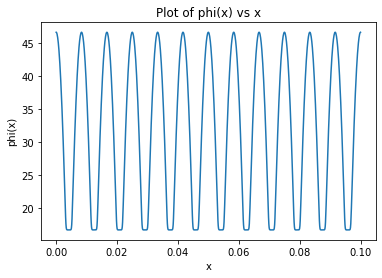

In [48]:
import matplotlib.pyplot as plt
import numpy as np


# Generate 200 x values from -audio_amplitude to audio_amplitude:
t_values = np.linspace(0, 0.1, num=1000)  
phi_values = np.array([Pi(audio_amplitude,quantum_frequency,temperature,t) for t in t_values])  # Calculate phi for each x value

plt.plot(t_values, phi_values)
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.title('Plot of phi(x) vs x')
plt.show()

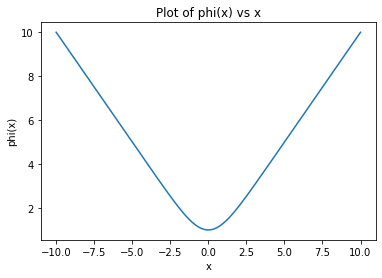

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(-10, 10, num=200)  # Generate 200 x values from -10 to 10
phi_values = np.array([phi(x) for x in x_values])  # Calculate phi for each x value

plt.plot(x_values, phi_values)
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.title('Plot of phi(x) vs x')
plt.show()

In [96]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio

# Set the sample rate and duration of the wave
sr = 44100  # 44.1 kHz sample rate
duration = 1  # 1 second

# Create the sawtooth wave
t = np.linspace(0, duration, sr * duration, endpoint=False)
waveform = signal.sin(2 * np.pi * 60 * t)


# Create the noise waveform
noise_waveform = np.random.normal(scale=0.01, size=waveform.shape)

# Add the noise to the sawtooth wave
mixed_waveform = waveform + 0.01*noise_waveform

# Play the wave
audio = Audio(data=mixed_waveform, rate=sr)
display(audio)

# Save the wave as an audio file
wavfile.write("sawtooth_wave.wav", sr, waveform)


AttributeError: module 'scipy.signal' has no attribute 'sin'

In [90]:
waveform.shape

(44100,)

In [52]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio

# Set the sample rate and duration of the wave
sr = 44100  # 44.1 kHz sample rate
duration = 1  # 1 second

# Create the sawtooth wave
t = np.linspace(0, duration, sr * duration, endpoint=False)
sawtooth_waveform = signal.sawtooth(2 * np.pi * 60 * t)

# Create the noise waveform
noise_waveform = np.random.normal(scale=0.1, size=sawtooth_waveform.shape)

# Add the noise to the sawtooth wave
mixed_waveform = sawtooth_waveform + 4*noise_waveform

# Play the mixed wave
audio = Audio(data=mixed_waveform, rate=sr)
display(audio)

# Save the mixed wave as an audio file
wavfile.write("mixed_wave.wav", sr, mixed_waveform)
